In [324]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import zscore
plt.style.use('fivethirtyeight')
%matplotlib inline
# https://valoriza.ipportalegre.pt/piaes/features-info-stats.html
# https://www.kaggle.com/datasets/thedevastator/higher-education-predictors-of-student-retention?resource=download

# Lab One: Exploring Table Data
Machine Learning in Python<br/>
Diogo Benetti Faé Rodrigues<br/>
Alex Shockley<br/>
Jay Kynerd<br/>
02/07/2023

**[1.5 points] In your own words, give an overview of the dataset. Describe the purpose of the data set you selected (i.e., why and how was this data collected in the first place?). What is the prediction task for your data and why are other third parties interested in the result? Once you begin modeling, how well would your prediction algorithm need to perform to be considered useful to these third parties?
Be specific and use your own words to describe the aspects of the data.**

## Business Understanding
#### Our dataset consists of several different features surrounding college students. The features can be broken down into four main sections: Demographic data, Socio-economic data, Macro-economic data, and Academic data. This dataset was created for academic use for gaining experience in using machine learning techniques to predict whether or not a student will succeed in a college environment. Success can be defined in several ways in this dataset, we will be focusing on predicting if a student will end up graduating, succeeding in college, or dropping out, not succeeding in college. Educational institutions may be interested in using a model that would predict graduation rate for several reasons. One might be that they want to check to see if someone is likely to graduate or not before giving them a scholarship. Another reason might be to determine if a university wants to admit a certain student. Our prediction algorithm would want to be about 75% accurate, it is not as important as something like medical data, but if a university is using this model to determine whether they should or should not give admission to a student, then we would want it to be more accurate.


**[1.5 points] Load the dataset and appropriately define data types. What data type should be used to represent each data attribute? Discuss the attributes collected in the dataset. For datasets with a large number of attributes, only discuss a subset of relevant attributes.<br/>
[1.5 points] Verify data quality: Explain any missing values or duplicate data. Visualize entries that are missing/complete for different attributes. Are those mistakes? Why do these quality issues exist in the data? How do you deal with these problems? Give justifications for your methods (elimination or imputation).**

# Data Understanding
#### Each attribute's value description can be found in the following link in detail:<br/>
https://valoriza.ipportalegre.pt/piaes/features-info-stats.html <br/><br/>
#### Let's start by reading the file and checking the data

In [325]:
data = pd.read_csv("Dropout.csv")
data.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


#### First thing we should look into is if there are any missing values in the table.

In [326]:
# Create a dataframe where missing values are True and False otherwise
missing = data.isna()
# Sum how many missing entries there are
total_missing = missing.sum()
total_missing

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

#### Luckily, there are no missing values, so we can go straight to analyzing the data.

In [327]:
cols = data.columns
print(cols.values)

['Marital status' 'Application mode' 'Application order' 'Course'
 'Daytime/evening attendance' 'Previous qualification' 'Nacionality'
 "Mother's qualification" "Father's qualification" "Mother's occupation"
 "Father's occupation" 'Displaced' 'Educational special needs' 'Debtor'
 'Tuition fees up to date' 'Gender' 'Scholarship holder'
 'Age at enrollment' 'International' 'Curricular units 1st sem (credited)'
 'Curricular units 1st sem (enrolled)'
 'Curricular units 1st sem (evaluations)'
 'Curricular units 1st sem (approved)' 'Curricular units 1st sem (grade)'
 'Curricular units 1st sem (without evaluations)'
 'Curricular units 2nd sem (credited)'
 'Curricular units 2nd sem (enrolled)'
 'Curricular units 2nd sem (evaluations)'
 'Curricular units 2nd sem (approved)' 'Curricular units 2nd sem (grade)'
 'Curricular units 2nd sem (without evaluations)' 'Unemployment rate'
 'Inflation rate' 'GDP' 'Target']


#### We have 34 columns, it looks like we might need to get rid of some to help us focus on the most relevant ones.<br/>
#### The dataset contains data about students enrolled in European higher education between the academic years 2008/2009 to 2018/2019. The attributes that we wish to keep should have some effect on a person's chance of graduation.<br/>
#### We can eliminate the parents' occupation and qualification because there are too many values for these attributes. For example, the father's occupation has 46 different values.

In [328]:
# Drop parents' information
data = data.drop(columns=["Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation"])

#### We can also strip the macro-economic data. Although this information does impact the student's ability to graduate, it mostly due to how well their national economy and currency are doing. We can afford to lose this data because we will keep more personal financial information into account, such as if they are debtors, have their tuition fees up to date, and are scholarship holders.

In [329]:
# Drop macro-economic data
data = data.drop(columns=["Unemployment rate", "Inflation rate", 'GDP'])

#### Other attributes that very likely have little to no significance in predicting a student's chance of graduation are the data about their applications. Furthermore, there are 18 different modes of application.

In [330]:
data = data.drop(columns=['Application mode', 'Application order'])

#### There are 794 rows with a target value of "Enrolled." Since our goal is to determine whether students dropout or graduate, we can get rid of these rows.

In [331]:
data[data["Target"] == "Enrolled"].shape

(794, 26)

In [332]:
data = data[data ['Target'] != "Enrolled"] # reduce dataframe to rows where target != "Enrolled"

#### Currently, academic data describing units enrolled, credited, graded, etc. are split between 1st and 2nd semester. We can reduce half of the columns by combining these into combined columns across both semester.

In [333]:
academic_attr = list(data.columns)[-13:-1]
academic_attr

['Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (grade)',
 'Curricular units 2nd sem (without evaluations)']

In [334]:
data["Curricular units (credited)"]            = data["Curricular units 1st sem (credited)"] + data["Curricular units 2nd sem (credited)"]
data["Curricular units (enrolled)"]            = data["Curricular units 1st sem (enrolled)"] + data["Curricular units 2nd sem (enrolled)"]
data["Curricular units (evaluations)"]         = data["Curricular units 1st sem (evaluations)"] + data["Curricular units 2nd sem (evaluations)"]
data["Curricular units (approved)"]            = data["Curricular units 1st sem (approved)"] + data["Curricular units 2nd sem (approved)"]
data["Curricular units (grade)"]               = data["Curricular units 1st sem (grade)"] + data["Curricular units 2nd sem (grade)"]
data["Curricular units (without evaluations)"] = data["Curricular units 1st sem (without evaluations)"] + data["Curricular units 2nd sem (without evaluations)"]
data.drop(academic_attr, axis=1, inplace=True)
data

,Marital status,Course,Daytime/evening attendance,Previous qualification,Nacionality,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Target,Curricular units (credited),Curricular units (enrolled),Curricular units (evaluations),Curricular units (approved),Curricular units (grade),Curricular units (without evaluations)
0,1,2,1,1,1,1,0,0,1,1,0,20,0,Dropout,0,0,0,0,0.000000,0
1,1,11,1,1,1,1,0,0,0,1,0,19,0,Graduate,0,12,12,12,27.666667,0
2,1,5,1,1,1,1,0,0,0,1,0,19,0,Dropout,0,12,0,0,0.000000,0
3,1,15,1,1,1,1,0,0,1,0,0,20,0,Graduate,0,12,18,11,25.828571,0
4,2,3,0,1,1,0,0,0,1,0,0,45,0,Graduate,0,12,15,11,25.333333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,15,1,1,1,0,0,0,1,1,0,19,0,Graduate,0,12,15,10,26.266667,0
4420,1,15,1,1,19,1,0,1,0,0,0,18,1,Dropout,0,12,12,8,23.000000,0
4421,1,12,1,1,1,1,0,0,1,0,1,30,0,Dropout,0,15,17,8,28.412500,0
4422,1,9,1,1,1,1,0,0,1,0,1,20,0,Graduate,0,10,11,10,25.800000,0


**[2 points] Visualize basic feature distributions. That is, plot the dynamic range and exploratory distribution plots (like boxplots, histograms, kernel density estimation) to better understand the data. Describe anything meaningful or potentially useful you discover from these visualizations. These may also help to understand what data is missing or needs imputation. Note: You can also use data from other sources to bolster visualizations. Visualize at least five plots, at least one categorical.<br/>
[2.5 points] Ask three interesting questions that are relevant to your dataset and explore visuals that help answer these questions. Use whichever visualization method is appropriate for your data.  Important: Interpret the implications for each visualization.**

## Data Visualization

#### We now have the most relevant attributes, but are all of them useful for us? Some features might be strongly dominated by a single value, which would make the prediction very biased towards that value.<br/>
#### Let's look at the Nationality and International features first:

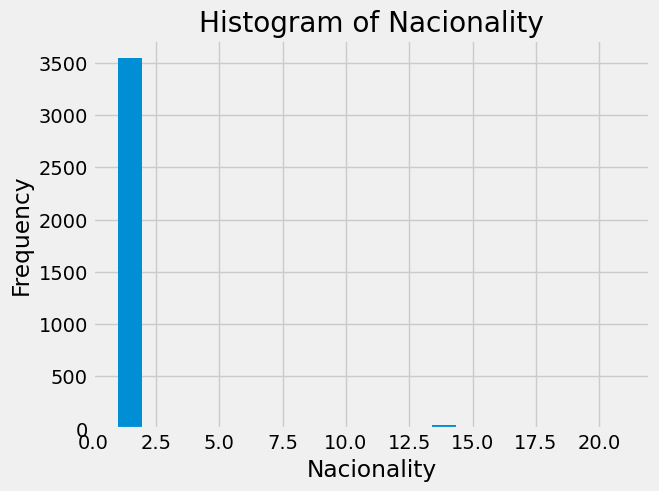

The percentage of Portuguese in the Nacionality column is 97.63%
The percentage of domestic students in the International column is 97.63%


In [335]:
# Histogram of Nationality
data["Nacionality"].hist(bins=21) # 21 bins because there are 21 values
plt.xlabel("Nacionality")
plt.ylabel("Frequency")
plt.title("Histogram of Nacionality")
plt.show()

value = 1 # Value of Portuguese
percentage = data[data["Nacionality"] == value].shape[0] / data.shape[0] * 100
print("The percentage of Portuguese in the Nacionality column is {:.2f}%".format(percentage))

value = 0 # Value of no
percentage = data[data["International"] == value].shape[0] / data.shape[0] * 100
print("The percentage of domestic students in the International column is {:.2f}%".format(percentage))

#### Nationality is a numeric and discrete attribute in this dataset. It is clear that most students are from one of the first country listed, Portugal in this case. The exact number of Portuguese students is 97.63%. Checking that percentage against the International column leads to the conclusion that all students are enrolled in Portuguese universities. Because the vast majority are domestic students, the prediction algorithm might have a strong bias against international students.

In [336]:
# Drop International and Nacionality columns
data = data.drop(columns=["International", 'Nacionality'])

#### How much do personal factors actually impact on the student's ability to graduate? Let's take a look at some them.

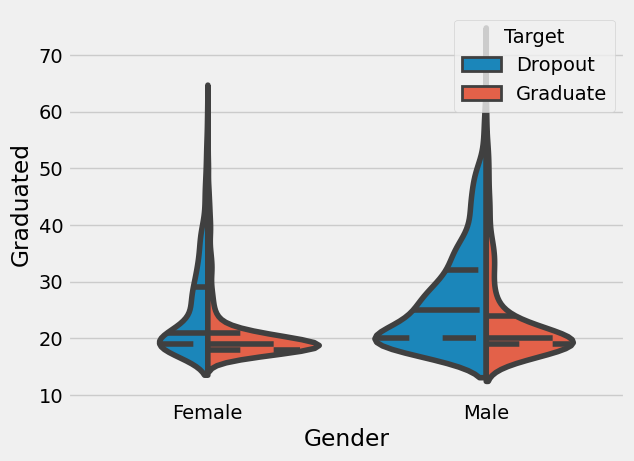

In [337]:
# Create a box plot
sns.violinplot(x='Gender', y='Age at enrollment', data=data,
                hue='Target',
                split=True, # split across violins
                inner="quart", # show innner stats like mena, IQR, 
                scale="count")

# Add labels to the plot
plt.xlabel('Gender')
plt.ylabel('Graduated')
plt.xticks([0, 1], ['Female', 'Male'])

# Show the plot
plt.show()

#### It looks like older female students have higher dropout rates compared to younger women. However, for the men it is the opposite. The violin plot also shows that most students are between the ages of 18 and 31. Another interesting remark is that woman tend to have better graduation rates than their colleagues.

# What about financial factors? Students who are struggling with money and keeping up with tuition must have a tougher time graduating as they are likely working or have an extra stress dealing with their financial situations.

In [338]:
financial_factors = data[['Debtor', 'Tuition fees up to date', 'Scholarship holder']]
financial_factors

,Debtor,Tuition fees up to date,Scholarship holder
0,0,1,0
1,0,0,0
2,0,0,0
3,0,1,0
4,0,1,0
...,...,...,...
4419,0,1,0
4420,1,0,0
4421,0,1,1
4422,0,1,1


#### What are the courses with the highest graduation and dropout rates?

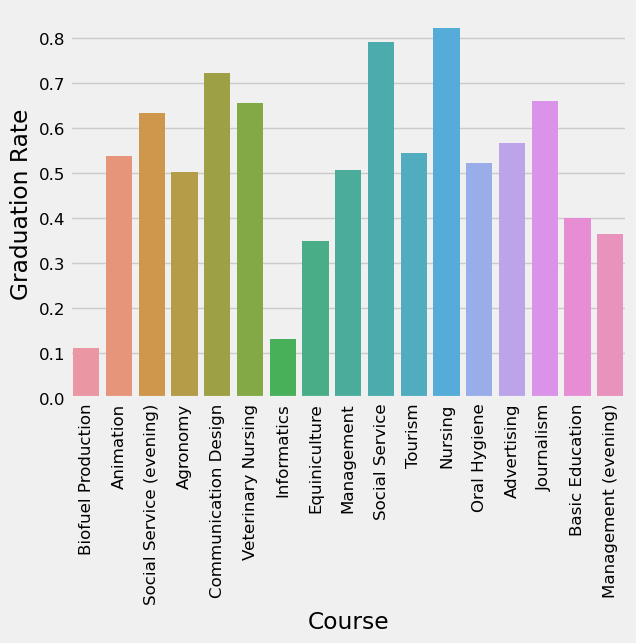

The courses with the highest graduation rates are:  ['Nursing' 'Social Service']


In [339]:
courses_list = ["Biofuel Production", 'Animation', 'Social Service (evening)',
            'Agronomy', 'Communication Design', 'Veterinary Nursing', 'Informatics',
            'Equiniculture', 'Management', 'Social Service',
            'Tourism', 'Nursing', 'Oral Hygiene', 'Advertising', 'Journalism',
            'Basic Education', 'Management (evening)']

# Group by course and find total number of enrolled students per course
grouped = data.groupby('Course')
total = grouped.size().reset_index(name='total')
# print(total)
# Find out how many graduated in each course
graduated = grouped['Target'].apply(lambda x: (x == 'Graduate').sum()).reset_index(name='graduated')
# Merge results
result = pd.merge(total, graduated, on='Course')
result['graduation_rate'] = result['graduated'] / result['total']
result['course_label'] = courses_list


sns.barplot(x='course_label', y='graduation_rate', data=result)

# Add labels to the plot
plt.xlabel('Course')
plt.ylabel('Graduation Rate')

# Increase the font size for the labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Rotate the x-axis labels to avoid overlapping
plt.xticks(rotation=90)

# Show the plot
plt.show()
print('The courses with the highest graduation rates are: ', result.nlargest(2, 'graduation_rate')['course_label'].unique())

#### Students in the 2 courses above are most likely to graduate as their course graduation rate is around 80%. It is interesting to see courses with such low rates, like Informatics and Biofuel Production with rates as low as 11%.

#### A good way to find relationships between variables is to use a Correlation Matrix. The matrix shows the linear relationship between 2 variables. The most relevant relationship the matrix below shows is that all the features about the academic units are strongly related to each other.

In [340]:
data
data_nominal = data.replace({
    'Marital status': {1:'Single',2:'Married',3:'Widower',4:'Divorced',5:'Facto Union',6:'Legally Seperated'},
    'Course': {1:'Biofuel Production Technologies',2:'Animation and MultiMedia Design',3:'Social Service (evening attendance)',4:'Agronomy',5:'Communication Design',6:'Veterinary Nursing',7:'Informatics Engineering',8:'Equiniculture',9:'Management',10:'Social Service',11:'Tourism',12:'Nursing',13:'Oral Hygiene',14:'Advertising/Marketing Management',15:'Journalism & Communication',16:'Basic Education',17:'Management (evening attendance)'},
    'Gender': {0:'Female',1:'Male'}
    })

# print(data_nominal.columns.values)
data_nominal.describe(include='all')

,Marital status,Course,Daytime/evening attendance,Previous qualification,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Target,Curricular units (credited),Curricular units (enrolled),Curricular units (evaluations),Curricular units (approved),Curricular units (grade),Curricular units (without evaluations)
count,3630,3630,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630,3630.000000,3630.000000,3630,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000
unique,6,17,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN
top,Single,Nursing,NaN,NaN,NaN,NaN,NaN,NaN,Female,NaN,NaN,Graduate,NaN,NaN,NaN,NaN,NaN,NaN
freq,3199,666,NaN,NaN,NaN,NaN,NaN,NaN,2381,NaN,NaN,2209,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,0.887603,2.552617,0.549036,0.011019,0.113774,0.866116,NaN,0.266942,23.461157,NaN,1.336088,12.633884,15.834160,9.309917,20.571015,0.271074
std,NaN,NaN,0.315897,3.952440,0.497658,0.104407,0.317580,0.340575,NaN,0.442423,7.827994,NaN,4.440661,4.762604,7.807659,6.264940,10.125851,1.277145
min,NaN,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,17.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,NaN,0.000000,19.000000,NaN,0.000000,10.000000,13.000000,5.000000,21.600000,0.000000
50%,NaN,NaN,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,NaN,0.000000,20.000000,NaN,0.000000,12.000000,16.000000,10.000000,24.666667,0.000000
75%,NaN,NaN,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,NaN,1.000000,25.000000,NaN,0.000000,14.000000,19.000000,12.000000,26.800000,0.000000


<AxesSubplot: >

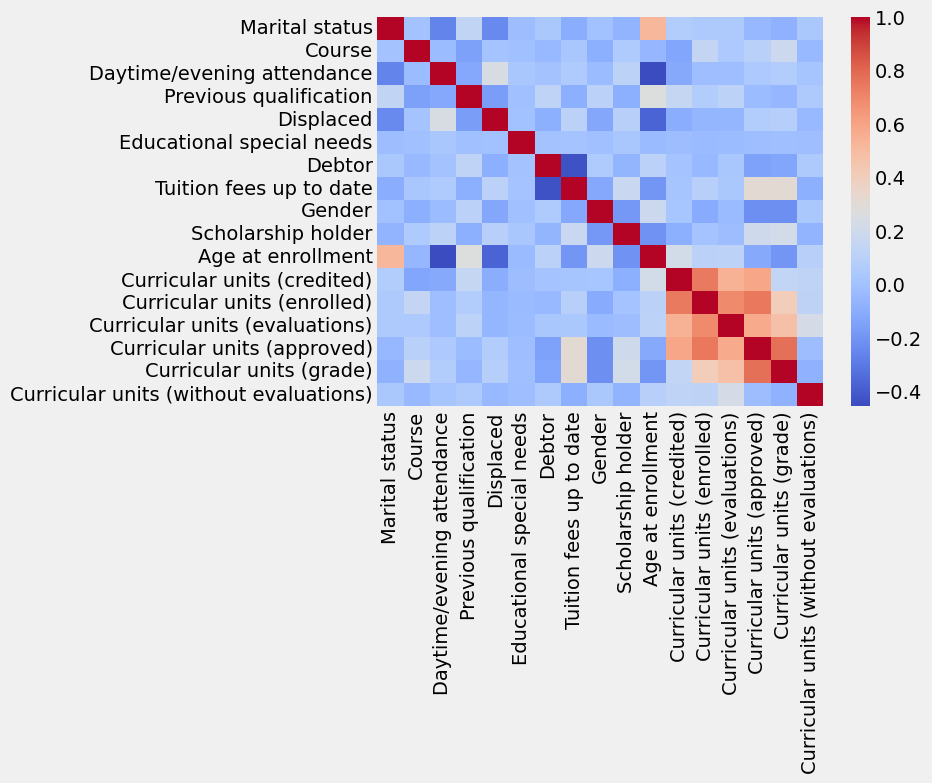

In [341]:
data_correlation = data.corr(numeric_only=True)

# plot the heatmap
sns.heatmap(data_correlation, cmap='coolwarm',
        xticklabels=data_correlation.columns,
        yticklabels=data_correlation.columns)

**(0.4) The overall quality of the report as a coherent, useful, and polished product will be reflected here. Does it make sense overall? Do your visualizations answer the questions you put forth in your business analysis? Do you properly and consistently cite sources and annotate changes made to base code? Do you provide specific reasons for your assumptions? Do subsequent questions follow naturally from initial exploration?<br/>
(7000 level ):explore dimensionality reduction techniques. The following are ideas for acceptable directions:
using at least two techniques of your choosing to reduce data dimensionality and two different parameter controls for each (min 4 things to compare) visualize and compare the results and discuss your thinking on the value (and limitations) of what you have presented.**

## Exceptional Work

#### Dimensionality Reduction is ...

In [342]:
# PCA, non lineart PCA 

## References
https://valoriza.ipportalegre.pt/piaes/features-info-stats.html - Dataset feature description <br/>
https://www.mdpi.com/2306-5729/7/11/146 - Article for the study<br/>
https://www.kaggle.com/datasets/thedevastator/higher-education-predictors-of-student-retention?resource=download - Kaggle